In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from packages.utils import standard_OHE



In [3]:
# import the dataset
df = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

# Concatenate the two datasets
df = pd.concat([df_train, df], ignore_index=True, sort=False)
df = df.dropna()
df = df.drop([ 'id', 'Unnamed: 0'], axis=1)
df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    129487 no

In [5]:
df.describe()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


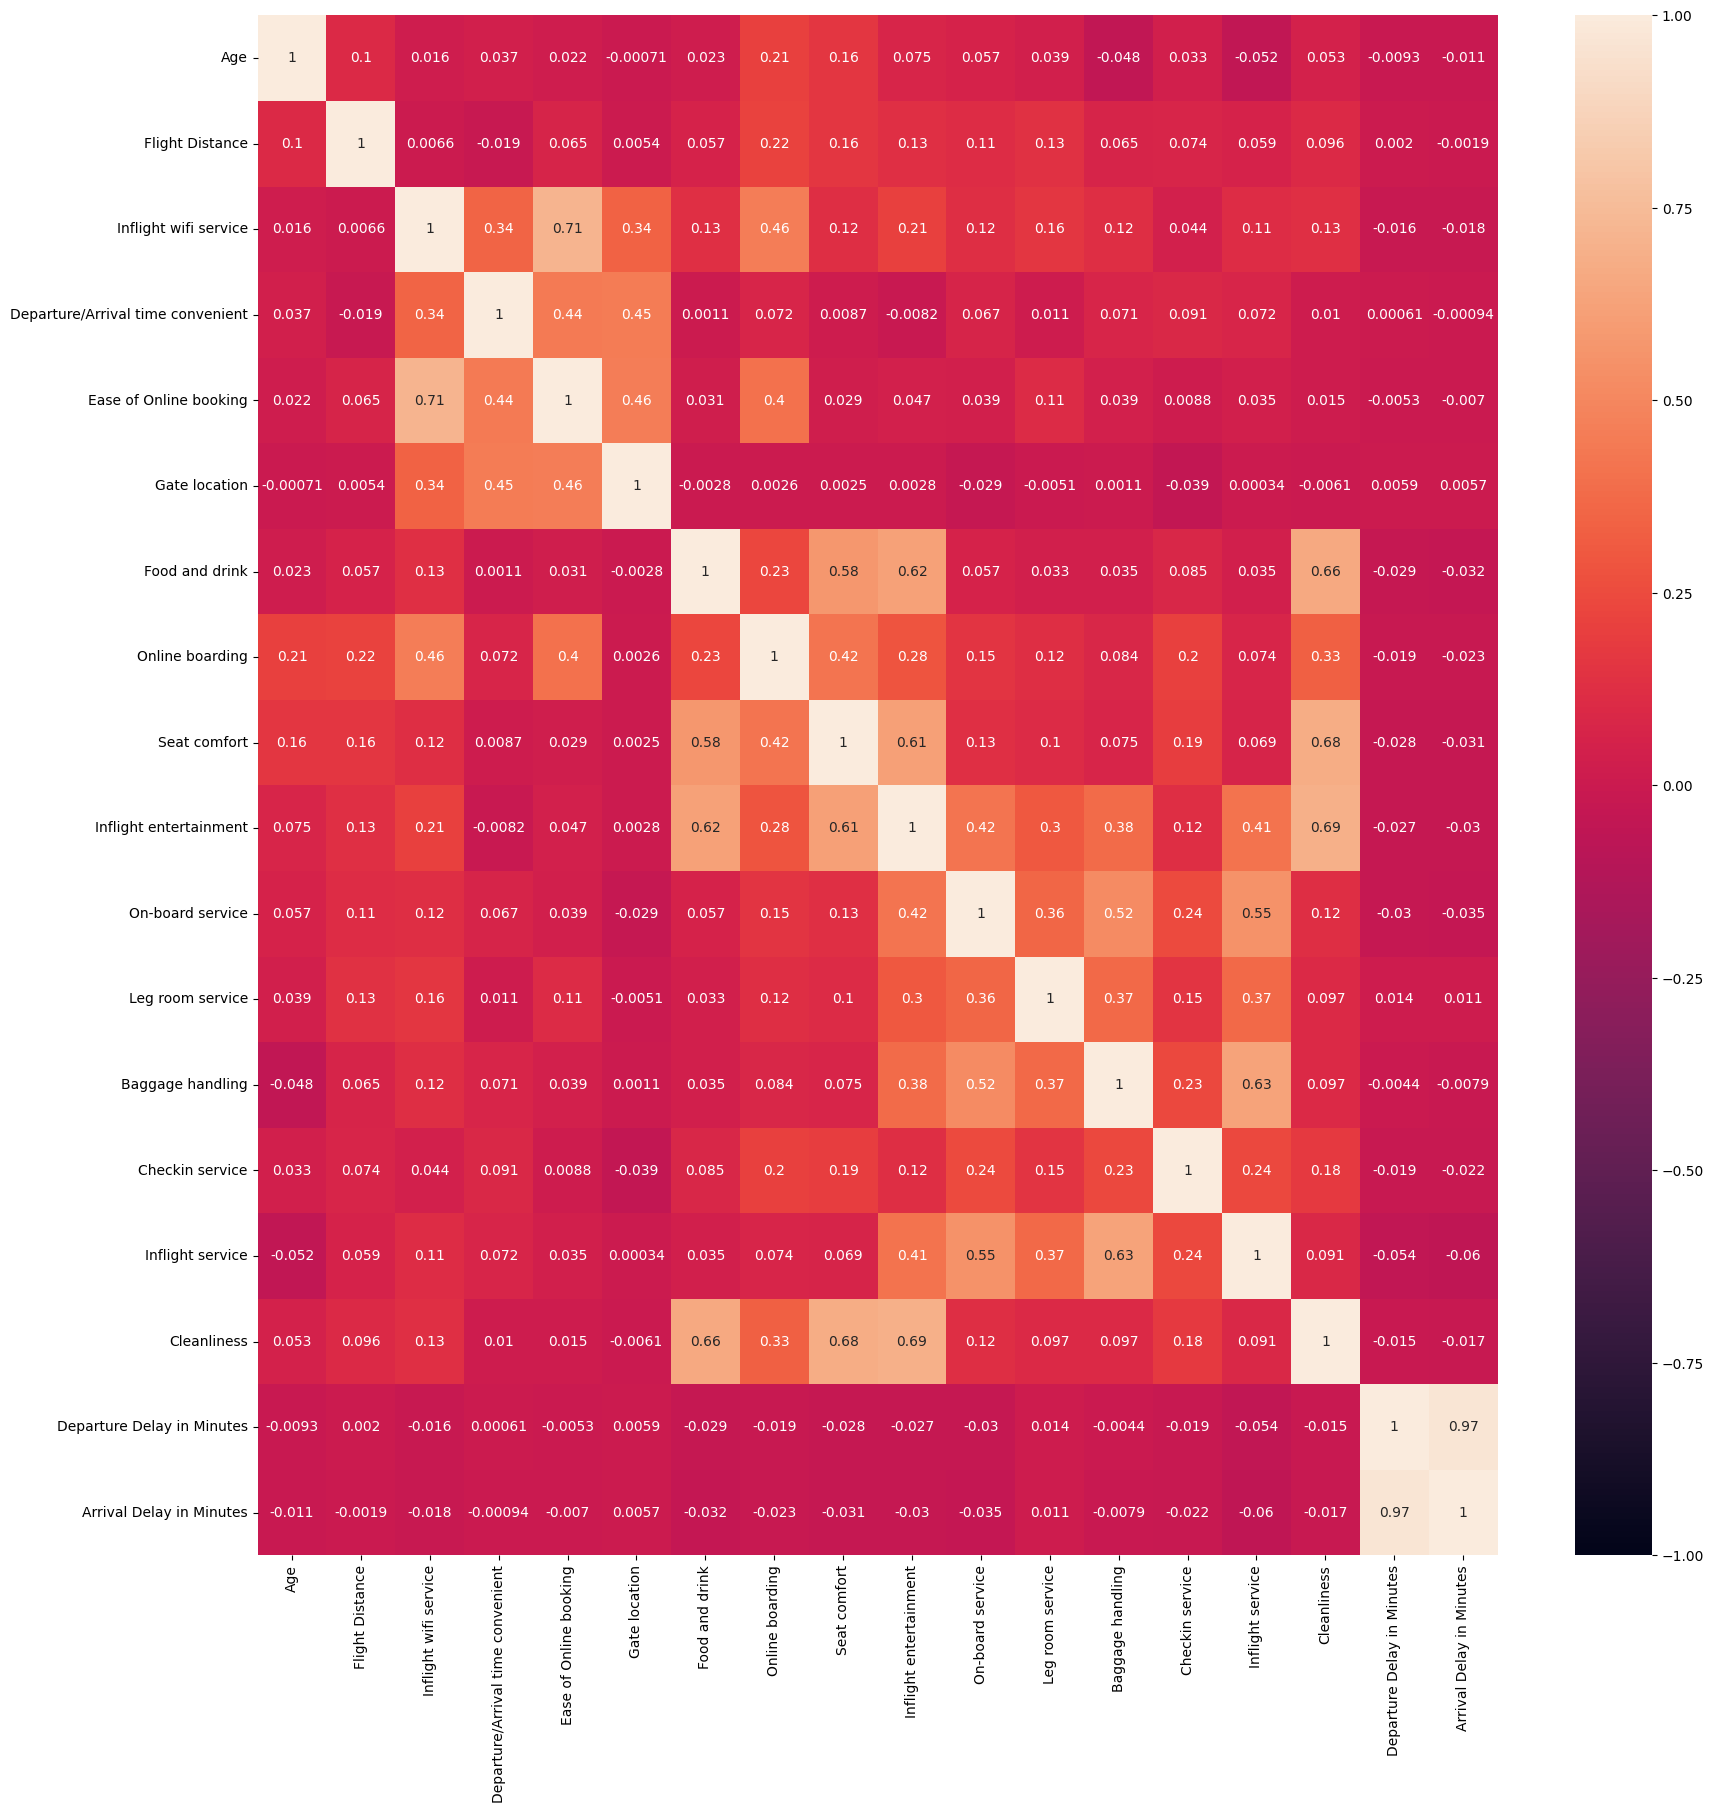

In [6]:
# Select only the numeric columns
df_num = df.select_dtypes(include = ['float64', 'int64'])

# Compute the correlation matrix
corr = df_num.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.show()


In [7]:
df = standard_OHE(df)


Categorical cols:['Class']
Binary cols:['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']


In [17]:
# Select numerical columns
y_col = 'satisfaction'

# Select numerical columns
df = df.select_dtypes(include=[np.number])

# Standardize the data ----> Very impo for PCA!
scaler = StandardScaler()

# Standardize the data
df_standardized = scaler.fit_transform(df.drop(y_col, axis=1))
df_standardized = pd.DataFrame(df_standardized, columns=df.columns.drop(y_col))
y = df[y_col]
df_standardized.head()


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,-1.014875,-0.473408,-1.748352,-1.494894,-0.732068,0.204062,0.617516,0.173475,-1.546364,1.349905,...,-0.267029,0.311829,0.548104,1.153761,1.304413,0.272589,0.075382,-0.958489,-0.902253,3.578459
1,-1.014875,2.112341,-0.954516,0.668944,-0.957619,0.204062,-0.692454,0.173475,0.017989,-1.657795,...,1.252759,-0.535579,-1.821386,0.303844,-1.740773,-0.359709,-0.236395,1.043309,-0.902253,-0.279450
2,0.985343,-0.473408,-0.888363,0.668944,-0.048398,-0.548256,-0.692454,-0.539999,-0.764188,1.349905,...,-0.267029,0.311829,0.548104,0.303844,1.304413,-0.386055,-0.392283,1.043309,-0.902253,-0.279450
3,0.985343,-0.473408,-0.954516,0.668944,-0.629818,-0.548256,1.272501,1.600423,1.582343,-0.905870,...,1.252759,-0.535579,-1.821386,0.303844,-0.979476,-0.096252,-0.158451,1.043309,-0.902253,-0.279450
4,-1.014875,-0.473408,1.426991,0.668944,-0.978670,0.204062,-0.037469,0.173475,0.017989,0.597980,...,0.492865,0.311829,-0.241726,-0.546072,-0.218180,-0.386055,-0.392283,1.043309,-0.902253,-0.279450


In [9]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)

# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)


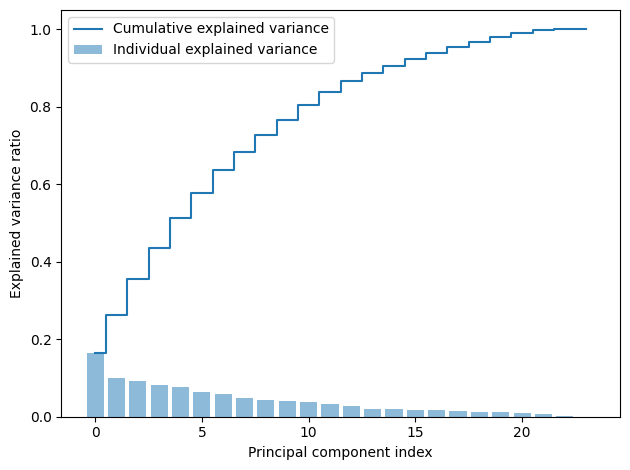

In [10]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Find index where cumulative explained variance is greater than 0.9
desidered_explained_variance = 0.75
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Number of components explaining 75% of variance: {index_selected}')


Number of components explaining 90% of variance: 10


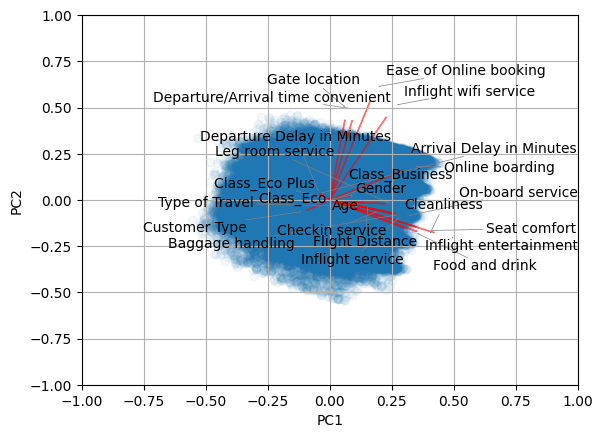

In [12]:
from adjustText import adjust_text

def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.05)
    
    texts = []
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        text = plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='black', ha='center', va='center')
        texts.append(text)
    
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

# Graphs meaning
 The graphical analysis aims to understand which variables influence each principal component:

- The code loops through each principal component up to index_selected to create individual plots.
- It calculates the standard deviation of the absolute values of the sorted loadings.
- The bars in the plot are colored based on whether the loading is above or below the standard deviation.



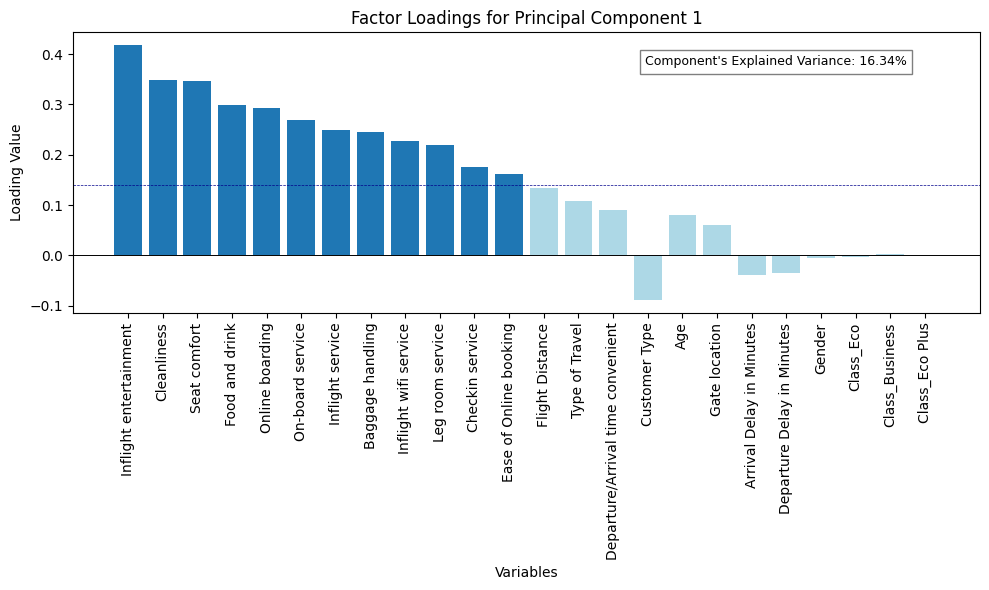

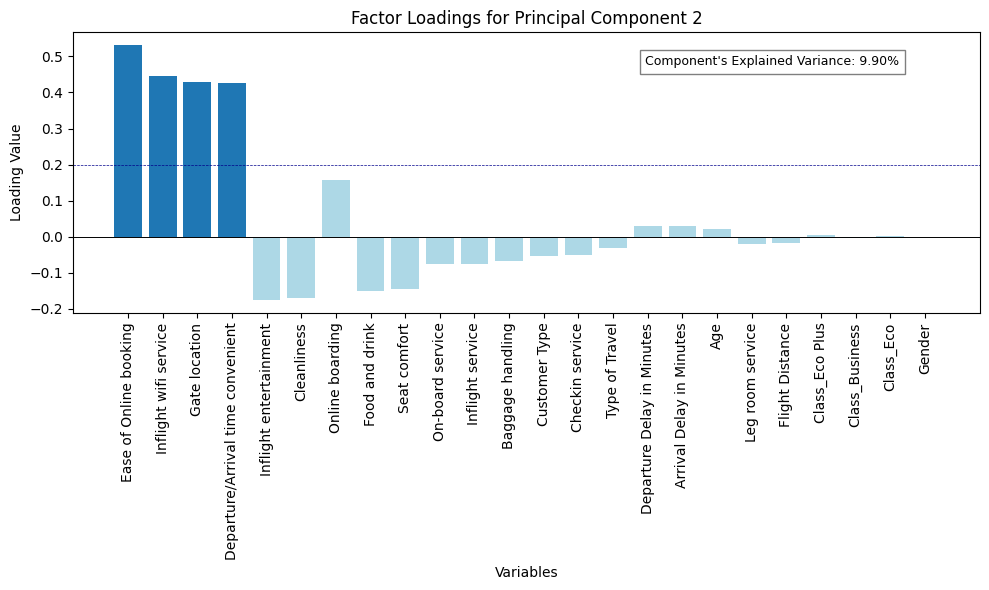

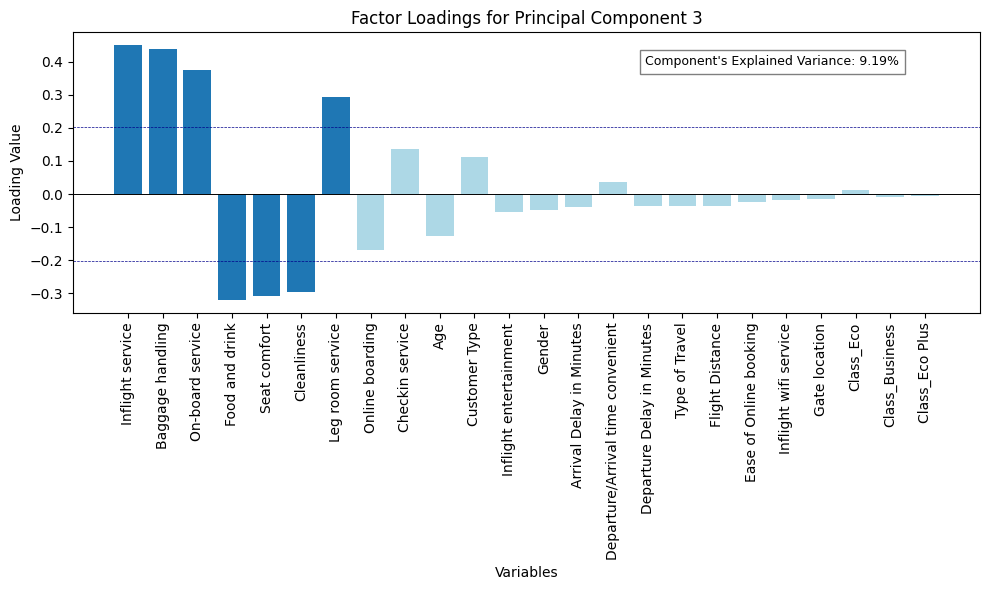

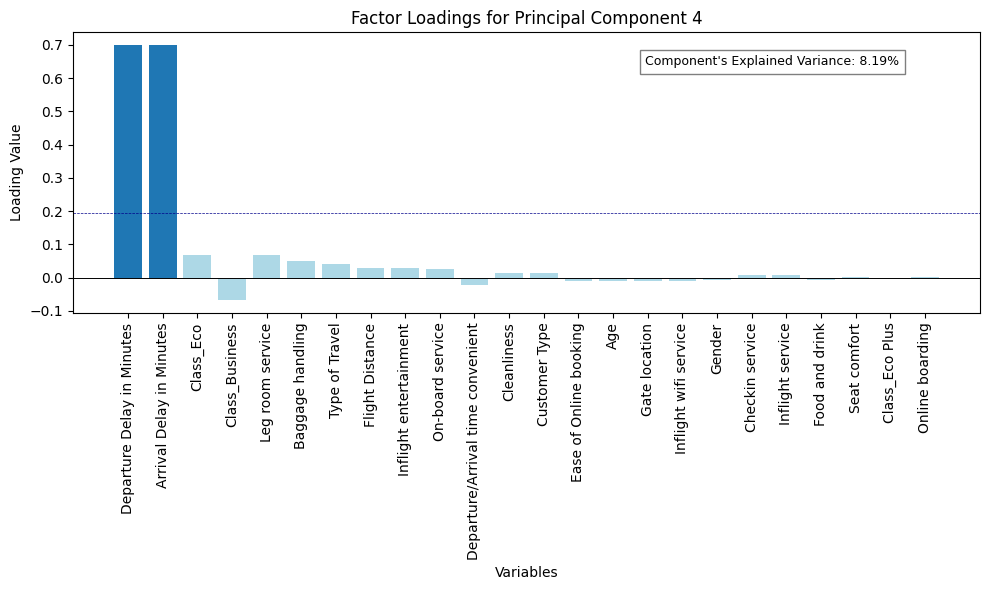

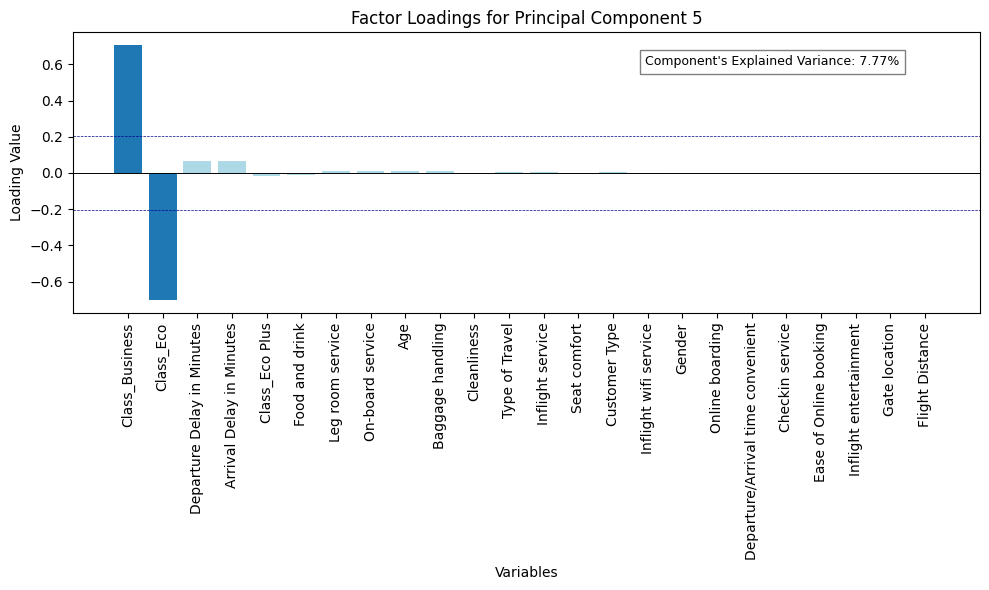

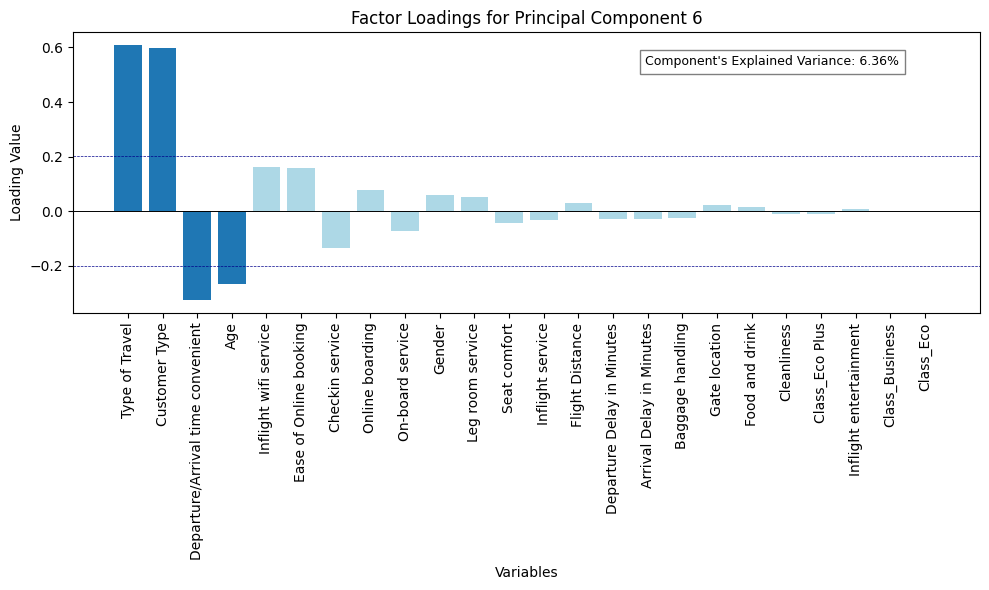

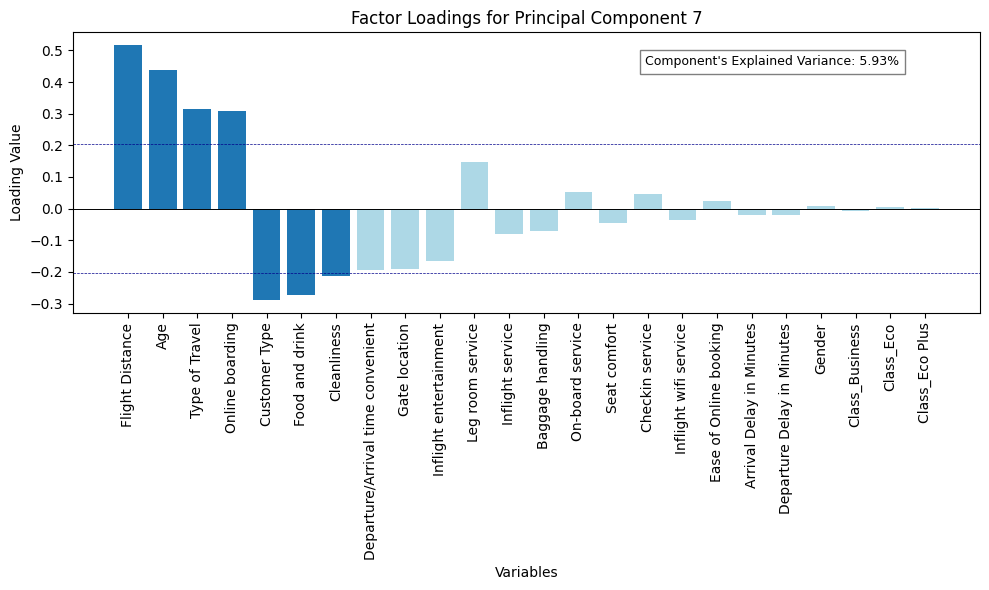

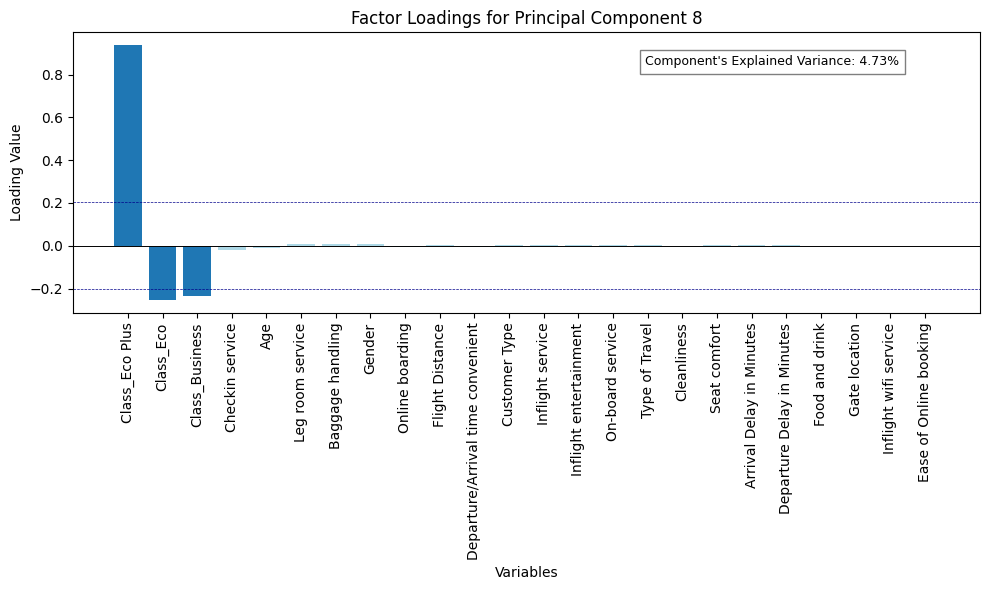

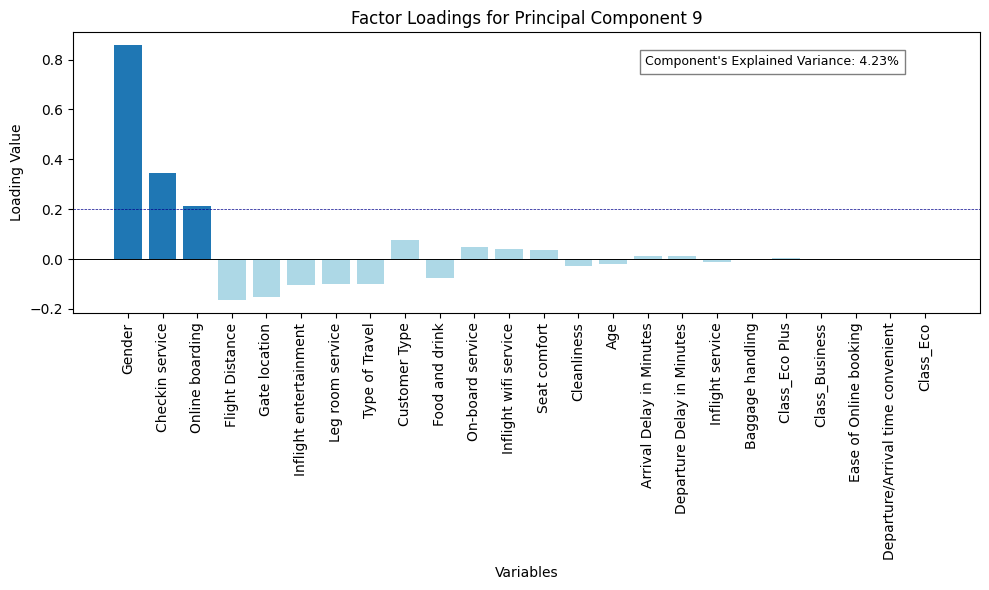

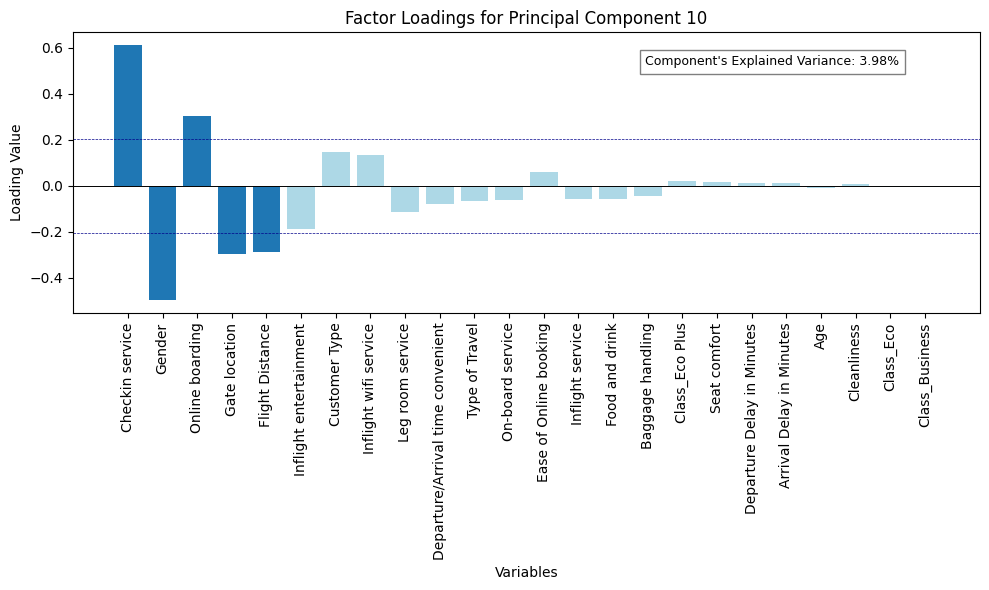

In [13]:
loadings = pca.components_.T

# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    standart_blue = '#1f77b4'
    colors = [standart_blue if abs(loading) >= std_loading else 'lightblue' for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color='darkblue', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)

    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color='darkblue', linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()

In [14]:
X = df_standardized

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy


0.8728843100042605

In [15]:
# Make regression model on PCA
X = x_new[:, :index_selected]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the accuracy
new_accuracy = metrics.accuracy_score(y_test, y_pred)
new_accuracy


0.8469731593012898

In [19]:
accuracy_ratio = round(accuracy / new_accuracy, 10)
print(f'Accuracy Ratio: {((accuracy_ratio  * 100)**-1 )-100}%')


Accuracy Ratio: -99.99029684518801%
